Assignment Code: DA-AG-015


1.What is Boosting in Machine Learning? Explain how it improves weak learners.


- What is Boosting?

- A weak learner is typically a simple model (e.g., a shallow Decision Tree or "stump") that may have slightly better than random performance (say 55–60% accuracy).

 - Boosting works in a sequential manner:

 - The first weak learner is trained on the original dataset.

 - The next learner is trained on the same dataset but gives more weight to the misclassified samples from the previous learner.

 - This process repeats, and each new learner focuses on the errors of the previous ones.

 - Finally, all weak learners are combined (weighted majority voting or weighted sum of predictions) to form a strong model.

- How Boosting Improves Weak Learners

 - Error-focused learning

 - Each new learner corrects the mistakes of the previous learners.

 - Example: If a Decision Stump misclassifies some points, the next stump pays more attention to those points.

- Weighted combination

 - Each weak learner is assigned a weight based on its performance.

 - Better learners get higher weights, weaker ones lower weights.

 - The final model is a weighted sum of predictions, which reduces bias and variance.

- Bias reduction

 - By combining many weak learners, boosting reduces bias (underfitting problem).

 - Even if one weak learner performs poorly, the ensemble collectively performs much better.

- Adaptive improvement

- - Unlike Bagging (which trains learners independently), Boosting is adaptive—later learners adapt based on earlier mistakes.

 - This makes it very powerful for complex data patterns.

-  Example of Boosting

 - Suppose we want to classify emails as spam or not spam:

 - A single decision stump might only look at one feature (e.g., presence of the word "offer"). Accuracy = 55%.

- Boosting trains multiple stumps:

 - 1st stump: focuses on "offer" → misclassifies some spam emails without "offer".

 - 2nd stump: focuses on "free" → fixes some mistakes of stump 1.

 - 3rd stump: focuses on "money" → fixes more mistakes.

 - Final boosted model combines them → Accuracy = 95%+.


 2.What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

1. AdaBoost (Adaptive Boosting)

 - Idea: Train weak learners sequentially, and reweight the training samples so that misclassified samples get higher weight in the next round.

- How training works:

 - Start with equal weights for all training samples.

 - Train the first weak learner (e.g., a decision stump).

 - Increase the weights of misclassified samples so the next learner focuses more on them.

 - Train the next weak learner on the reweighted dataset.

 - Repeat this process for several learners.

 - Final prediction = weighted vote/average of weak learners, where each learner’s weight depends on its accuracy.

 - Key Mechanism: Emphasizes difficult samples by adjusting data weights.

🔹 2. Gradient Boosting

- Idea: Train weak learners sequentially, but instead of reweighting samples, each new learner is trained to fit the residual errors (or gradients of the loss function) of the previous model.

- How training works:

 - Start with an initial prediction (e.g., mean value for regression).

 - Compute residuals (actual – predicted) or negative gradient of loss function.

 - Train the next weak learner to predict these residuals.

 - Add the learner’s predictions (scaled by a learning rate) to improve the model.

 - Repeat this process, gradually reducing the errors.

 - Final prediction = sum of all weak learners’ contributions.



 3.How does regularization help in XGBoost?

 - XGBoost (Extreme Gradient Boosting) is one of the most widely used machine learning algorithms because of its exceptional performance, scalability, and robustness. One of the key reasons for its success lies in its effective use of regularization techniques. Regularization refers to the process of adding penalty terms to the objective function of a model to control its complexity and prevent overfitting. In XGBoost, regularization plays a central role by ensuring that the model not only fits the training data well but also generalizes effectively to unseen data.

Objective Function with Regularization

The objective function in XGBoost is given as:

- 𝑂
𝑏
𝑗
=
𝐿
(
𝑦
^
,
𝑦
)
+
Ω
(
𝑓
)
Obj=L(
y
^
	​

,y)+Ω(f)

Here:

𝐿
(
𝑦
^
,
𝑦
)
L(
y
^
	​

,y) is the loss function, which measures how well the model predictions
𝑦
^
y
^
	​

 match the actual values
𝑦
y.

Ω
(
𝑓
)
Ω(f) is the regularization term, which penalizes the complexity of the trees.

The regularization term is defined as:

Ω
(
𝑓
)
=
𝛾
𝑇
+
1
2
𝜆
∑
𝑗
=
1
𝑇
𝑤
𝑗
2
Ω(f)=γT+
2
1
	​

λ
j=1
∑
T
	​

w
j
2
	​


Where:

𝑇
T = number of leaves in the tree,

𝑤
𝑗
w
j
	​

 = weight (or score) assigned to leaf
𝑗
j,

𝜆
λ = L2 regularization parameter on leaf weights,

𝛾
γ = penalty for each additional leaf in the tree.

- This formulation ensures that trees with too many leaves or overly large leaf weights are penalized, thereby reducing the risk of overfitting.

- How Regularization Helps

 - Controls Model Complexity
Without regularization, gradient boosting algorithms may produce deep and overly complex trees that perfectly fit the training data but fail to generalize. The parameter
𝛾
γ directly controls tree complexity by adding a cost for each additional leaf. Only splits that significantly reduce the loss are allowed, which results in simpler and more interpretable models.

- Prevents Overfitting through Leaf Weight Penalty
The term
𝜆
∑
𝑤
𝑗
2
λ∑w
j
2
	​

 - applies an L2 penalty on the leaf weights. This prevents leaf scores from becoming excessively large, which could cause the model to rely too heavily on certain features or noise in the data. By shrinking leaf weights, XGBoost produces smoother and more stable predictions.

 - Balances Bias-Variance Tradeoff
Boosting methods generally have low bias but can suffer from high variance, especially when many trees are added. Regularization helps reduce variance by limiting model flexibility, while still maintaining low bias through sequential learning. This balance improves generalization on unseen data.

 - Prunes Irrelevant Splits
During training, XGBoost calculates the gain from splitting a node. If the gain after applying the penalty term is not positive, the split is discarded. This pruning mechanism ensures that only beneficial splits are retained, which leads to compact and efficient trees.

 - Additional Regularization Methods
Beyond L1 and L2 penalties, XGBoost also uses shrinkage (learning rate) and subsampling techniques. Shrinkage scales the contribution of each tree, preventing over-reliance on any single learner. Subsampling rows and columns introduces randomness, similar to bagging, which reduces correlation among trees and further prevents overfitting.


4.Why is CatBoost considered efficient for handling categorical data?


- CatBoost is considered highly efficient for handling categorical data because it directly integrates categorical feature encoding into its algorithm, instead of requiring manual preprocessing like one-hot encoding or label encoding. Here’s a detailed explanation of why it is efficient:

1. Native Handling of Categorical Features

 - Most machine learning algorithms (e.g., XGBoost, LightGBM) require categorical variables to be manually transformed into numerical representations. Common methods like one-hot encoding can:

 - Blow up feature dimensions (especially with high-cardinality features).

 - Lose information about category relationships.

 - CatBoost solves this internally by transforming categorical features into numerical values in a statistically sound way, without huge dimensional expansion.

2. Target-Based Encoding with Permutation

 - CatBoost uses a special method called “Ordered Target Statistics” (or Ordered Target Encoding):

 - Instead of replacing a category with the mean target value (which causes target leakage), CatBoost builds encodings based on permutations of the dataset.

  For each row, the algorithm computes statistics (like mean label) from only the preceding examples in the permutation.

 - This ensures that the model does not “peek” at the future data while encoding, reducing target leakage and overfitting.

 - This encoding is more informative than one-hot and more robust than simple label encoding.

3. Efficient Handling of High-Cardinality Features

 - One-hot encoding with thousands of categories becomes infeasible.

 - CatBoost handles high-cardinality categorical features naturally, without blowing up memory or runtime.

 - This makes it efficient for datasets with features like user IDs, product IDs, ZIP codes, etc.

4. Combination of Categorical Features

 - CatBoost automatically generates combinations of categorical features during training.
 - For example: if you have "City" and "Product Category", it can create an interaction feature "City × Product Category" on the fly.
This expands the model’s ability to capture complex relationships, without manual feature engineering.

5. Reduced Overfitting

 - Thanks to ordered encoding and statistical techniques, CatBoost reduces the risk of overfitting on categorical variables — which is a common problem when using naive target encoding.

6. Practical Efficiency

 - Ease of use: You can just pass categorical column indices or names to CatBoost; no manual preprocessing needed.

 - Training speed: Optimized C++ implementation and symmetric trees make it faster than many alternatives, even with categorical encodings.

 - Better accuracy: It often outperforms LightGBM and XGBoost when categorical variables are dominant.


5.What are some real-world applications where boosting techniques are
preferred over bagging methods?


- Why Boosting is Preferred in Some Cases

 - Bagging reduces variance by averaging many independent learners (good for noisy/high-variance models like decision trees).

 - Boosting reduces both bias and variance by sequentially correcting the mistakes of earlier models, making it more powerful for complex, structured data.

 - Boosting often achieves higher accuracy than bagging when the dataset is structured, imbalanced, or requires learning from complex relationships.

🔹 Real-World Applications Where Boosting Excels
1. Finance & Banking (Credit Scoring, Fraud Detection)

 - Boosting models (XGBoost, LightGBM) are widely used for predicting loan defaults, credit risk, and fraud detection.

 - These tasks involve imbalanced datasets (few fraud cases vs. many normal transactions). Boosting handles class imbalance better by focusing on hard-to-classify cases.

2. Healthcare & Medical Diagnosis

 - Used in predicting disease risks (e.g., diabetes, cancer detection, heart disease prognosis).

 - Boosting is preferred because:

 - Medical datasets often have complex feature interactions (age × lifestyle × genetic factors).

 - Boosting captures nonlinear relationships better than bagging.

3. Marketing & Customer Analytics

 - Applications: Customer churn prediction, recommendation systems, targeted ads, click-through rate prediction.

 - Boosting works well because:

 - Data is usually tabular with many categorical features (region, product category, browsing history).

 - CatBoost and LightGBM are optimized for categorical variables, making boosting very effective.

4. Insurance (Risk Assessment & Claim Prediction)

 - Boosting is used for predicting insurance claims, fraud, and premium pricing.

 - Insurance data is highly imbalanced and requires models that can focus on rare but important cases.

5. Competitions & Research (Kaggle, Data Science Challenges)

 - Boosting methods (XGBoost, LightGBM, CatBoost) dominate Kaggle leaderboards because:

 - They achieve state-of-the-art accuracy on tabular datasets.

 - They balance speed, accuracy, and interpretability.

6. Natural Language Processing (NLP) & Text Classification

 - While deep learning dominates NLP, boosting is still used for:

 - Sentiment analysis, spam filtering, topic classification (when dataset is small/medium).

 - Boosting works well with sparse, high-dimensional features (like TF-IDF vectors).

7. Manufacturing & Predictive Maintenance

 - Boosting is applied to predict equipment failures, quality control issues, supply chain risks.

 - These datasets often have rare failure cases — boosting focuses on the “hard” examples.

 6.● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks  
.Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(
    n_estimators=100,   # number of weak learners
    learning_rate=0.5,  # step size for updating weights
    random_state=42
)

# Train the model
adaboost.fit(X_train, y_train)

# Predictions
y_pred = adaboost.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy on Breast Cancer dataset:", accuracy)


AdaBoost Classifier Accuracy on Breast Cancer dataset: 0.9649122807017544


7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,   # number of boosting stages
    learning_rate=0.1,  # step size shrinkage
    max_depth=3,        # depth of individual trees
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Evaluate performance (R² score)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R² score on California Housing dataset:", r2)


Gradient Boosting Regressor R² score on California Housing dataset: 0.8004451261281281


8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=200,   # number of trees
    max_depth=3,        # depth of trees
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Define parameter grid for learning_rate
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

# Train models
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classifier Accuracy on Breast Cancer dataset:", accuracy)


Best Parameters: {'learning_rate': 0.3}
XGBoost Classifier Accuracy on Breast Cancer dataset: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:59:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9.  Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy on Breast Cancer dataset: 0.9649122807017544


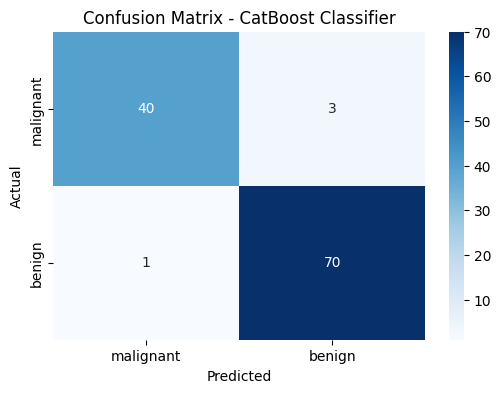

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,          # suppress training logs
    random_state=42
)

# Train the model
cat_model.fit(X_train, y_train)

# Predictions
y_pred = cat_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy on Breast Cancer dataset:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [6]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


10.You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model




- Step 1: Data Preprocessing
1. Handle Missing Values

 - Numeric features: impute with median (robust to outliers).

 - Categorical features: impute with a special category (e.g., "Missing") or mode.

 - Some boosting algorithms (CatBoost, XGBoost) can directly handle missing values during training, reducing preprocessing burden.

2. Handle Categorical Features

 - Option A (CatBoost): Handles categorical features natively (ordered target statistics).

 - Option B (XGBoost/LightGBM): Encode using target encoding or one-hot encoding (for low-cardinality features).

3. Feature Scaling

 - Boosting algorithms (tree-based) don’t require scaling, unlike linear models.

 - But normalization might help if additional models are compared.

4. Class Imbalance

 - Dataset is imbalanced (fewer defaults than non-defaults).

 - Solutions:

 - Use class weights (higher weight for default class).

 - Use SMOTE/oversampling cautiously.

 - Boosting models can incorporate imbalance parameters:

 - scale_pos_weight in XGBoost

 - class_weights in CatBoost

- Step 2: Choice of Algorithm

 - AdaBoost → simple, but weaker on high-dimensional + categorical data.

 - XGBoost → great performance, efficient, widely used in finance. Handles missing values. Needs encoding for categorical features.

 - CatBoost → best when many categorical features exist, avoids one-hot encoding, reduces overfitting risk.

  Choice:

 - If many categorical features → CatBoost.

 - If mostly numeric features → XGBoost.

 - For a FinTech loan dataset (usually mix of both), CatBoost is a strong candidate.

- Step 3: Hyperparameter Tuning
Key Hyperparameters:

 - n_estimators → number of trees (too high = overfit, too low = underfit).

 - learning_rate → controls step size; smaller with higher n_estimators improves generalization.

 - max_depth → controls complexity of each tree.

 - subsample → fraction of samples per tree (helps prevent overfitting).

 - colsample_bytree (XGBoost) → feature subsampling for regularization.

 - scale_pos_weight (XGBoost) or class_weights (CatBoost) → handle imbalance.

- Strategy:

 - Start with RandomizedSearchCV for coarse search.

 -  Refine with GridSearchCV around the best candidates.

 - Use cross-validation (Stratified K-Fold) to preserve class ratio.

- Step 4: Evaluation Metrics

 - Since the dataset is imbalanced, plain accuracy is misleading.

  Preferred metrics:

 - ROC-AUC score → measures ability to rank defaults vs non-defaults.

 - Precision, Recall, F1-score → especially recall (catch as many defaults as possible).

 - PR-AUC (Precision-Recall AUC) → more informative when defaults are rare.

 - Confusion Matrix → for business interpretation (false positives vs false negatives).

 - Business priority:

 - False negatives (predicting non-default when customer defaults) are costlier → focus on recall / sensitivity.

-  Step 5: Business Benefits

 - Risk Management: Early identification of risky borrowers → reduced loan losses.

 - Profit Maximization: Focus lending on low-risk customers, improving ROI.

 - Regulatory Compliance: Model transparency (feature importance) helps explain credit decisions to regulators.

 - Customer Segmentation: Insights into which features drive default risk → targeted interventions (e.g., financial counseling, adjusted interest rates).

 - Operational Efficiency: Automated credit scoring reduces manual review workload.